In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np 


In [3]:
fashion_mnsit =keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnsit.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#look at the data types of the variable 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)


x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [7]:
#take a look at the first image 
index=10
x_train[index]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

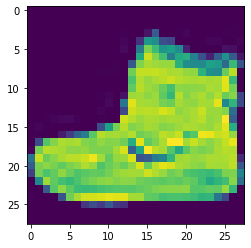

In [8]:
#showing image as picture 
img=plt.imshow(x_train[0])

In [9]:
#getting the image label 
print('The image label is ',y_train[index])

The image label is  0


In [10]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','sneaker','bag','Ankel Boot']

In [11]:
#Normalize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

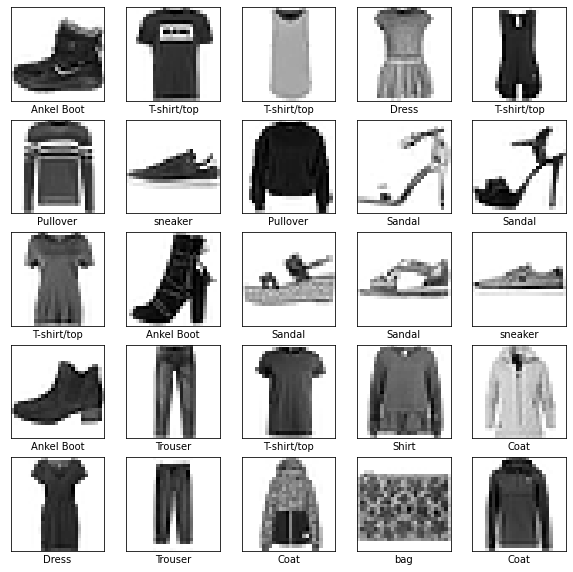

In [12]:
%matplotlib inline 
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])


In [13]:
#build the mode
#ceate a model architecture 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [17]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 2ms/step - loss: 0.6214 - accuracy: 0.7844
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3848 - accuracy: 0.8612
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8920


In [18]:
test_loss,test_acc=model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.3662 - accuracy: 0.8665


In [19]:
predictions=model.predict(x_test)

In [20]:
predictions[0]


array([8.3430984e-07, 1.4011070e-07, 2.5819663e-06, 1.4978795e-07,
       9.0669772e-07, 7.1476740e-03, 2.0340592e-06, 2.8520355e-02,
       5.0436583e-06, 9.6432018e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

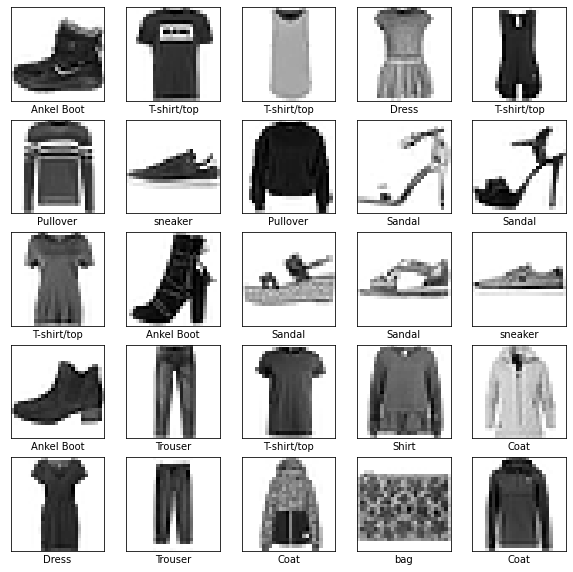

In [22]:
%matplotlib inline 
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  predicated_label=np.argmax(predictions[i])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])